#  LDA Model File

## Import Packages

In [1]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install wordcloud

import warnings 
warnings.filterwarnings('ignore')

     |████████████████████████████████| 366 kB 27.3 MB/s eta 0:00:01


In [2]:
# Repeated from pre_processing.py

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('stopwords') # <---------- ADDED IN
from nltk.corpus import stopwords
from train_wordvecs import tokenize
import pandas as pd
import numpy as np
import pickle
from train_wordvecs import load_data
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Slow version of gensim.models.doc2vec is being used
Slow version of Fasttext is being used


# Generate Features

In [3]:
# Import pickle file of tokenized text
re_tokened = pickle.load(open('re_tokenized_lemma.pkl', 'rb'))
re_tokened[:1]

[['manuscript',
  'evidence',
  'Austen',
  'continue',
  'work',
  'piece',
  'late',
  'period',
  '1809',
  "''",
  '11',
  'niece',
  'nephew',
  'Anna',
  'James',
  'Edward',
  'Austen',
  'make',
  'addition',
  'late',
  '1814']]

In [4]:
print('Length', len(re_tokened))

Length 416768


# LDA Model

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv('WikiLarge_Train.csv')
df.head(5)

,original_text,label
0,There is manuscript evidence that Austen conti...,1
1,"In a remarkable comparative analysis , Mandaea...",1
2,"Before Persephone was released to Hermes , who...",1
3,Cogeneration plants are commonly found in dist...,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1


In [7]:
# # Test Feature Representation: Pass full text to vectorizer
# # This approach produced poorer results and was abandoned
# original_text = df['original_text']
# vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
# X = vectorizer.fit_transform(original_text)
# # X_dense = X.toarray()
# X.shape

#### Implement CountVectorizer

In [8]:
# Pass cleaned tokens to vectorizer
joined_token_list = []
for each_list in re_tokened:
    token_sentence = " ".join(each_list)
    joined_token_list.append(token_sentence)
original_text = joined_token_list
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2)) 
X = vectorizer.fit_transform(original_text)
X.shape

(416768, 1630864)

In [9]:
# print(X)

In [1]:
# Create LDA Model
# (inspired by SIADS 543 HW)

def LDA_model(n_topics, X):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model = lda.fit(X)
    return lda_model

## LDA Log Likelihood and Perplexity Evaluation

In [ ]:
# LDA Log Likelihood and Perplexity
# Inspired by https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
log_likelihood_list = []
perplexity_list = []

# Iterating through cluster sizes
for n_clusters in range_n_clusters:
    lda_model = LDA_model(n_clusters, X)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For n_clusters =", n_clusters,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For n_clusters =", n_clusters,"The perplexity is :", perplexity)

In [ ]:
# Plot LDA Log Likelihood and Perplexity
# to determine optimal cluster number

fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, log_likelihood_list,'b-',label='Log Likelihood')
plt.xlabel("Number of cluster")
plt.ylabel("log Likelihood")
plt.legend()

fig.add_subplot(122)
plt.plot(range_n_clusters, perplexity_list,'b-',label='Perplexity')
plt.xlabel("Number of cluster")
plt.ylabel("Perplexity")
plt.legend()
plt.show()

In [ ]:
plt.plot(range_n_clusters, log_likelihood_list,'b-',label='Log Likelihood')

In [ ]:
plt.plot(range_n_clusters, perplexity_list,'b-',label='Perplexity')

## LDA Top Terms in Clusters

In [12]:
# Print out top terms from clusters
# (inspired by SIADS 543 HW Solution Approach)

n_clusters = 10
lda_model = LDA_model(n_clusters, X)
topic_models = lda_model.components_
tf_feature_names = vectorizer.get_feature_names()

num_top_words = 10

def display_topics(model, feature_names, no_top_words):
    results=[]
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        key = 'topic_'+str(topic_idx)
        results.append([key, term_list])
    return results
        
results = display_topics(lda_model, tf_feature_names, num_top_words)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
for each in results:
    print(each[0], ": ", each[1])  

topic_0 :  ['bear', 'use', 'american', 'new', 'know', 'district', 'people', 'hockey', 'film', 'canton']
topic_1 :  ['france', 'department', 'commune', 'region', 'north', 'la', 'aisne', 'northern', 'year', 'calvados']
topic_2 :  ['use', 'make', 'island', 'metal', 'minister', 'world', 'know', 'september', 'west', 'germany']
topic_3 :  ['use', 'make', 'population', 'city', 'river', 'time', 'live', 'rock', 'district', 'main']
topic_4 :  ['calais', 'pas', 'pas calais', 'north', 'world', 'united', 'year', 'region', 'france', 'department']
topic_5 :  ['united', 'city', 'states', 'united states', 'county', 'large', 'area', 'bear', 'state', 'american']
topic_6 :  ['football', 'bear', 'play', 'player', 'team', 'football player', 'league', 'national', 'club', 'game']
topic_7 :  ['game', 'video', 'release', 'number', 'know', 'include', 'music', 'make', 'video game', 'series']
topic_8 :  ['hurricane', 'tropical', 'storm', 'make', 'use', 'know', 'state', 'km', 'time', 'day']
topic_9 :  ['new', 'univ

## pyLDAvis

In [13]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, X, vectorizer, mds='tsne')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
panel

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  12.113496
6       0.648955  71.707100       2        1  10.789648
4      71.019684   9.971006       3        1  10.533523
1       3.785981  33.185135       4        1  10.137301
0     -42.666500  -9.222070       5        1  10.037496
8      -3.621689 -43.526516       6        1   9.581358
2      -3.632402  -4.171708       7        1   9.379222
7     -36.584400  35.804413       8        1   9.338254
9      44.391380  50.615383       9        1   9.134793
3      40.235809 -31.591665      10        1   8.954909, topic_info=               Term          Freq         Total Category  logprob  loglift
622637       france  14027.000000  14027.000000  Default  30.0000  30.0000
454636   department  11857.000000  11857.000000  Default  29.0000  29.0000
611398     football   9349.000000   9349.000000  Default  28.0000  28.0000
368963      commune  10260.000000  10260.000000  Default  27.0000  27.0000
1529178      united  11881.000000  11881.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
750835      include    708.914906   8842.787229  Topic10  -6.9638  -0.1107
215968         bear    807.287373  16717.883297  Topic10  -6.8339  -0.6176
1618122        year    737.559435  11219.915156  Topic10  -6.9242  -0.3091
829146         know    724.063969  12478.965952  Topic10  -6.9427  -0.4340
162303         area    635.310099   6447.589952  Topic10  -7.0735   0.0956

[762 rows x 6 columns], token_table=         Topic      Freq      Term
term                              
2429         1  0.121540        10
2429         2  0.097785        10
2429         3  0.159383        10
2429         4  0.088945        10
2429         5  0.058284        10
...        ...       ...       ...
1623165      9  0.051292     young
1623165     10  0.226786     young
1626590      8  0.935262     zelda
1626590     10  0.055015     zelda
1627981     10  0.972006  zip code

[2509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 5, 2, 1, 9, 3, 8, 10, 4])

## K-Means Word Clouds

In [53]:
# Generate Word Clouds
# inspired by
# https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
# https://www.kaggle.com/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn

import matplotlib.pyplot as plt
from wordcloud import WordCloud

n_clusters = 10
lda_model = LDA_model(n_clusters, X)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster: 0


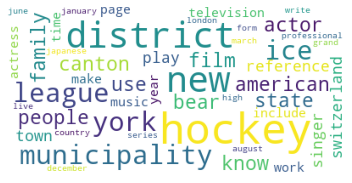

Cluster: 1


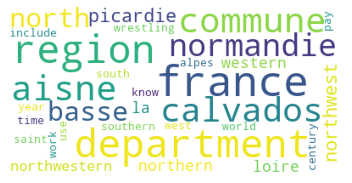

Cluster: 2


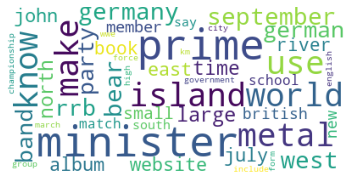

Cluster: 3


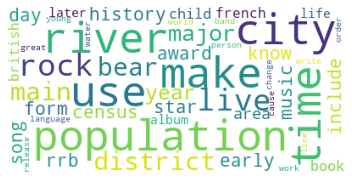

Cluster: 4


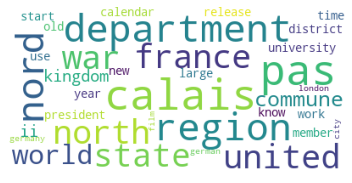

Cluster: 5


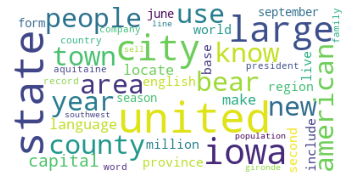

Cluster: 6


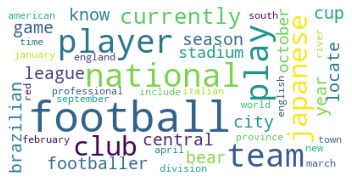

Cluster: 7


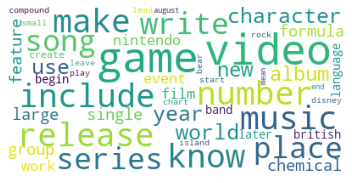

Cluster: 8


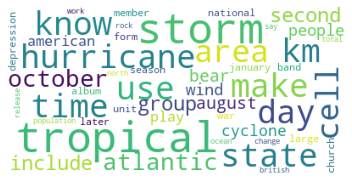

Cluster: 9


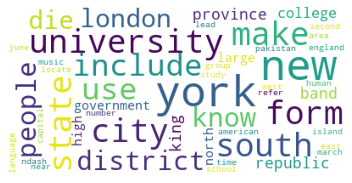

In [64]:
vocab = vectorizer.get_feature_names()

for index in range(0,n_clusters):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(imp_words_topic)
    print('Cluster: {}'.format(index))
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## LDA Parameter Tuning Test for alpha and beta

In [ ]:
# Beyond parameter for number of clusters, also do
# a limited test for impact of doc_topic_prior at 10 clusters

# Redefine the LDA_model function to accept doc_topic_prior
def LDA_model(n_topics, X, doc_topic_prior):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, doc_topic_prior=doc_topic_prior)
    lda_model = lda.fit(X)
    return lda_model

# LDA Log Likelihood and Perplexity

n_clusters = 10
doc_topic_prior_rates = [0.1, 0.5, 1, 5, 10, 20, 30]

log_likelihood_list = []
perplexity_list = []

# Iterating through decay rates
for doc_topic_prior in doc_topic_prior_rates:
    lda_model = LDA_model(n_clusters, X, doc_topic_prior)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For doc_topic_prior =", doc_topic_prior,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For doc_topic_prior =", doc_topic_prior,"The perplexity is :", perplexity)

In [29]:
# Beyond parameter for number of clusters, also do
# a limited test for impact of topic_word_prior at 10 clusters

# Redefine the LDA_model function to accept topic_word_prior
def LDA_model(n_topics, X, topic_word_prior):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, topic_word_prior=topic_word_prior)
    lda_model = lda.fit(X)
    return lda_model

# LDA Log Likelihood and Perplexity

n_clusters = 10
topic_word_prior_rates = [0.1, 0.5, 1, 5, 10, 20, 30]

log_likelihood_list = []
perplexity_list = []

# Iterating through decay rates
for topic_word_prior in topic_word_prior_rates:
    lda_model = LDA_model(n_clusters, X, topic_word_prior)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For topic_word_prior =", topic_word_prior,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For topic_word_prior =", topic_word_prior,"The perplexity is :", perplexity)

For topic_word_prior = 0.1 The log likelihood is : -100412389.19575325
For topic_word_prior = 0.1 The perplexity is : 161500.5677626869
For topic_word_prior = 0.5 The log likelihood is : -102543421.05864146
For topic_word_prior = 0.5 The perplexity is : 208308.06267389384
For topic_word_prior = 1 The log likelihood is : -103897264.04532109
For topic_word_prior = 1 The perplexity is : 244865.15915116732
For topic_word_prior = 5 The log likelihood is : -105649362.96912912
For topic_word_prior = 5 The perplexity is : 301859.3188561156
For topic_word_prior = 10 The log likelihood is : -107552684.93678695
For topic_word_prior = 10 The perplexity is : 378901.0362455253
For topic_word_prior = 20 The log likelihood is : -109703291.3463522
For topic_word_prior = 20 The perplexity is : 489861.27547064476
For topic_word_prior = 30 The log likelihood is : -110996950.48029841
For topic_word_prior = 30 The perplexity is : 571705.5628071005
